<a href="https://colab.research.google.com/github/worklifesg/Python-for-Computer-Vision-with-OpenCV-and-Deep-Learning/blob/main/7.%20Deep%20Learning%20CNN/3_DeepLearning_ConvolutionNeuralNetworks_CATSDOGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deteksi Objek dan Klasifikasi Gambar dengan Convolution Neural Network


Dataset yang digunakan adalah gambar berwarna kustom kita sendiri, yang berada di folder CATS_DOGS,
di dalam folder tersebut terdapat test dan train, kemudian di dalamnya masing-masing folder
tersebut terdapat 2 kelas yaitu CAT dan DOG

Link google drive Dataset
https://drive.google.com/file/d/1U6RtBhML-Lj0w2suve0UhQmwcF5pfJCm/view?usp=sharing


In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

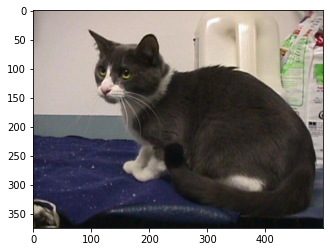

In [2]:
# Membaca satu gambar dari drive

# Pertama-tama, perlu melakukan mount drive dan menyalin jalur gambar

cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [3]:
cat4.shape # Tiga saluran warna

(375, 500, 3)

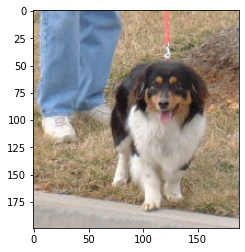

In [4]:
# Silakan unggah gambar anjing

dog = cv2.imread('CATS_DOGS/train/DOG/2.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [5]:
dog.shape

(199, 188, 3)

Jadi, kita melihat bahwa gambar-gambar memiliki ukuran yang berbeda. Untuk memastikan setiap kali kita memiliki gambar, kita perlu memprosesnya terlebih dahulu. <b>Di Keras, terdapat sebuah fungsi yang secara otomatis memproses data dan menghasilkan aliran batch dari sebuah direktori -- > ImageDataGenerator<b>

In [6]:
from keras.preprocessing.image import ImageDataGenerator


# Tidak hanya ukurannya yang akan berbeda,
# akan ada fluktuasi gambar seperti pandangan samping atau atas agar gambar terlihat jelas.

image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest',)


# rotation_range = secara acak memutar gambar (minor)
# width_shift_range = menggeser lebar sedikit sepanjang sumbu x (%)
# height_shift_range = menggeser tinggi sedikit sepanjang sumbu y (%)
# rescale = normalisasi oleh 255
# shear_range = memotong bagian dari gambar
# zoom_range = memperbesar/memperkecil gambar
# horizontal_flip = sepanjang sumbu y
# vertical_flip = sepanjang sumbu x
# Ketika kita merescale, menggeser, zoom, shear,
# mungkin ada beberapa piksel yang hilang sehingga kita dapat mengisi piksel-piksel tersebut 
# dengan ukuran piksel terdekat

Using Theano backend.


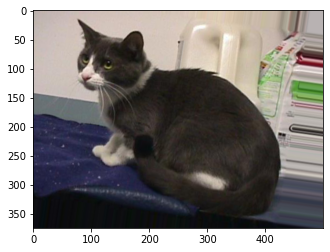

In [7]:
plt.imshow(image_gen.random_transform(cat4))

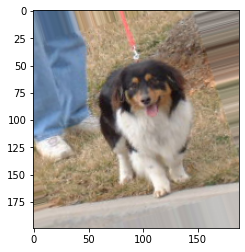

In [8]:
plt.imshow(image_gen.random_transform(dog)) #View 1

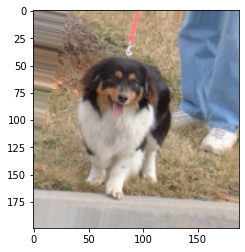

In [9]:
plt.imshow(image_gen.random_transform(dog)) #View 2

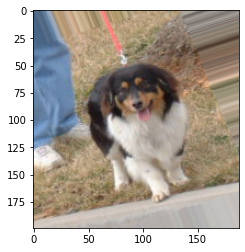

In [10]:
plt.imshow(image_gen.random_transform(dog)) #View 3

In [11]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [12]:
#Build and train out model now

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation

input_shape=(150,150,3)

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5)) #randomly turned 50% off neurons - help in overfitting

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [14]:
batch_size= 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [15]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [16]:
import warnings
warnings.filterwarnings('ignore')

# Menggunakan epochs = 30 untuk mencapai akurasi > 70% 
# dan dapat menjalankan 100 epochs untuk mencapai akurasi 85%.

results = model.fit_generator(train_image_gen,epochs=30,steps_per_epoch=150,
                              validation_data=test_image_gen,validation_steps=12) #150*16 iamges per epoch to save training time

Epoch 1/30
150/150 [==============================] - 140s 936ms/step - loss: 0.6971 - acc: 0.5121 - val_loss: 0.6910 - val_acc: 0.5502
Epoch 2/30
150/150 [==============================] - 139s 927ms/step - loss: 0.6887 - acc: 0.5617 - val_loss: 0.6809 - val_acc: 0.5754
Epoch 3/30
150/150 [==============================] - 141s 937ms/step - loss: 0.6860 - acc: 0.5563 - val_loss: 0.6771 - val_acc: 0.5775
Epoch 4/30
150/150 [==============================] - 141s 938ms/step - loss: 0.6739 - acc: 0.5885 - val_loss: 0.6658 - val_acc: 0.6020
Epoch 5/30
150/150 [==============================] - 144s 959ms/step - loss: 0.6820 - acc: 0.5642 - val_loss: 0.6743 - val_acc: 0.5828
Epoch 6/30
150/150 [==============================] - 148s 988ms/step - loss: 0.6719 - acc: 0.5879 - val_loss: 0.6534 - val_acc: 0.6193
Epoch 7/30
150/150 [==============================] - 148s 986ms/step - loss: 0.6579 - acc: 0.6038 - val_loss: 0.6357 - val_acc: 0.6354
Epoch 8/30
150/150 [============================

In [21]:
print(results.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


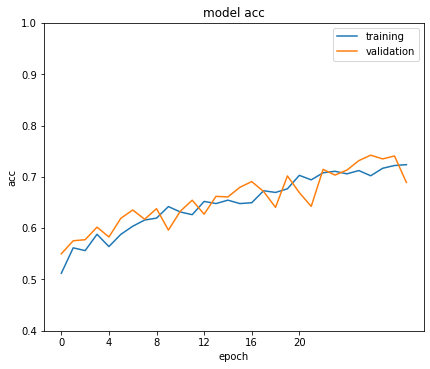

In [22]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])
  ax.set_ylim(0.4,1)
  ax.set_xticks([0,4,8,12,16,20])

plt.subplots(figsize=(6,10))
plt.tight_layout()
display_training_curves(results.history['acc'], results.history['val_acc'], 'acc', 211)

##### Prediksi pada gambar-gambar

In [23]:
from keras.preprocessing import image
import numpy as np

dog_file = 'CATS_DOGS/test/DOG/10000.jpg'
dog_img = image.load_img(dog_file,target_size=(150,150)) 
dog_img = image.img_to_array(dog_img) # to array #dog_img.shape = 150,150,3

# Tetapi, kita perlu mengonversi gambar ini menjadi sebuah batch sehingga 
# jaringan saraf menganggapnya sebagai sebuah batch dengan dimensi gambar ini.

dog_img = np.expand_dims(dog_img,axis=0) #now dog_img.shape = 1,150,150,3

dog_img = dog_img/255 #normalize

In [24]:
model.predict_classes(dog_img) # Untuk memprediksi kelas

array([[1]], dtype=int32)

In [25]:
# Untuk memeriksa akurasi

model.predict(dog_img)

array([[0.6940112]], dtype=float32)